File for Decision Tree and Random Forest on old Houston data

In [1172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [1173]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [1174]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import metrics

In [1175]:
from imblearn.under_sampling import NearMiss

In [1176]:
# houston rainfall 
df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

# df = pd.concat([df_10, df_11, df_12, df_13, df_14, df_15])

df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
# df = df_06

In [1177]:
# ithaca data from NOAA 
# df = pd.read_csv('datasets/daily_ithaca_data.csv', na_values='Blank').dropna()

In [1178]:
df.head(10)

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
0,2006-01-01,64.0,81.0,0.0,8.0,14.0,90.0,54.0,29.77,29.65,Cloudy,Partly Cloudy,71.0,81.0,No,No
1,2006-01-02,57.0,79.0,0.0,9.0,10.0,87.0,22.0,29.91,29.89,Partly Cloudy,Fair,63.0,78.0,No,No
2,2006-01-03,49.0,79.0,0.0,0.0,10.0,60.0,24.0,30.07,29.98,Fair,Fair,60.0,79.0,No,No
3,2006-01-04,52.0,76.0,0.0,7.0,7.0,87.0,60.0,30.06,29.97,Mostly Cloudy,Mostly Cloudy,65.0,75.0,No,No
4,2006-01-05,51.0,69.0,0.0,16.0,23.0,42.0,21.0,30.20,30.13,Fair,Fair / Windy,57.0,68.0,No,No
5,2006-01-06,43.0,63.0,0.0,14.0,12.0,37.0,20.0,30.32,30.19,Fair,Fair,52.0,63.0,No,No
6,2006-01-07,38.0,74.0,0.0,8.0,10.0,52.0,54.0,30.18,30.01,Fair,Mostly Cloudy,50.0,77.0,No,No
7,2006-01-08,54.0,75.0,0.0,7.0,16.0,80.0,50.0,29.98,29.91,Fair,Partly Cloudy,62.0,75.0,No,No
8,2006-01-09,58.0,78.0,0.0,5.0,15.0,87.0,55.0,30.06,29.90,Mostly Cloudy,Mostly Cloudy,64.0,70.0,No,No
9,2006-01-10,43.0,65.0,0.0,20.0,12.0,54.0,36.0,30.26,30.14,Mostly Cloudy,Fair,51.0,61.0,No,No


In [1179]:
df.rain_tomorrow = df.rain_tomorrow.map(dict(Yes=1, No=0))
#only for houston rainfall dataset 

In [1180]:
df['rainfall_tomorrow'] = df['rainfall'].shift(1)
# df['rainfall_tomorrow'] = df['precipitation'].shift(1)

df.dropna()
df.head

<bound method NDFrame.head of            date  min_temp  max_temp  rainfall  wind_speed9am  wind_speed3pm  \
0    2006-01-01      64.0      81.0       0.0            8.0           14.0   
1    2006-01-02      57.0      79.0       0.0            9.0           10.0   
2    2006-01-03      49.0      79.0       0.0            0.0           10.0   
3    2006-01-04      52.0      76.0       0.0            7.0            7.0   
4    2006-01-05      51.0      69.0       0.0           16.0           23.0   
..          ...       ...       ...       ...            ...            ...   
360  2021-12-27      68.0      81.0       0.0            5.0           16.0   
361  2021-12-28      72.0      84.0       0.0           14.0           15.0   
362  2021-12-29      72.0      84.0       0.0            9.0           12.0   
363  2021-12-30      67.0      83.0       0.0            8.0            9.0   
364  2021-12-31      73.0      85.0       0.0           10.0           17.0   

     humidity9am  hum

In [1181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 364
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               3617 non-null   object 
 1   min_temp           3617 non-null   float64
 2   max_temp           3617 non-null   float64
 3   rainfall           3617 non-null   float64
 4   wind_speed9am      3617 non-null   float64
 5   wind_speed3pm      3617 non-null   float64
 6   humidity9am        3617 non-null   float64
 7   humidity3pm        3617 non-null   float64
 8   pressure9am        3617 non-null   float64
 9   pressure3pm        3617 non-null   float64
 10  cloud9am           3617 non-null   object 
 11  cloud3pm           3617 non-null   object 
 12  temp9am            3617 non-null   float64
 13  temp3pm            3617 non-null   float64
 14  rain_today         3617 non-null   object 
 15  rain_tomorrow      3617 non-null   int64  
 16  rainfall_tomorrow  3616 n

In [1182]:
# rainfall = df['precipitation'].to_numpy()
rainfall = df['rainfall'].to_numpy()


In [1183]:
df.describe().T #measures of spread 

,count,mean,std,min,25%,50%,75%,max
min_temp,3617.0,62.720210,14.211336,0.00,52.00,66.00,75.00,83.00
max_temp,3617.0,79.484932,12.915457,27.00,72.00,82.00,90.00,106.00
rainfall,3617.0,0.286066,1.167100,0.00,0.00,0.00,0.00,20.60
wind_speed9am,3617.0,8.797346,4.597471,0.00,6.00,8.00,12.00,30.00
wind_speed3pm,3617.0,10.588886,4.891796,0.00,7.00,10.00,14.00,31.00
humidity9am,3617.0,70.145701,15.841515,10.00,63.00,71.00,81.00,97.00
humidity3pm,3617.0,54.371026,18.373612,9.00,42.00,54.00,67.00,97.00
pressure9am,3617.0,30.015012,0.164393,29.46,29.91,29.99,30.10,30.72
pressure3pm,3617.0,29.943276,0.158386,29.39,29.84,29.93,30.03,30.59
temp9am,3617.0,70.783522,14.127046,19.00,61.00,74.00,83.00,94.00


In [1184]:
print(df.describe())

          min_temp     max_temp     rainfall  wind_speed9am  wind_speed3pm  \
count  3617.000000  3617.000000  3617.000000    3617.000000    3617.000000   
mean     62.720210    79.484932     0.286066       8.797346      10.588886   
std      14.211336    12.915457     1.167100       4.597471       4.891796   
min       0.000000    27.000000     0.000000       0.000000       0.000000   
25%      52.000000    72.000000     0.000000       6.000000       7.000000   
50%      66.000000    82.000000     0.000000       8.000000      10.000000   
75%      75.000000    90.000000     0.000000      12.000000      14.000000   
max      83.000000   106.000000    20.600000      30.000000      31.000000   

       humidity9am  humidity3pm  pressure9am  pressure3pm      temp9am  \
count  3617.000000  3617.000000  3617.000000  3617.000000  3617.000000   
mean     70.145701    54.371026    30.015012    29.943276    70.783522   
std      15.841515    18.373612     0.164393     0.158386    14.127046   
m

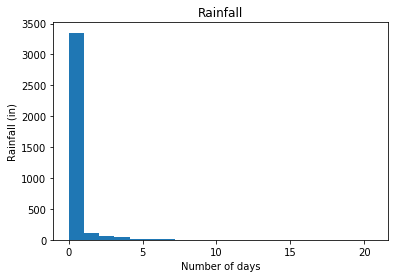

In [1185]:
plt.hist(rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Rainfall")

plt.show()

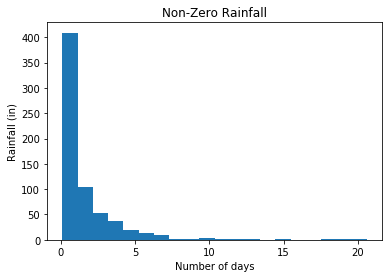

In [1186]:
non_zero_rainfall = rainfall[rainfall != 0]
plt.hist(non_zero_rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Non-Zero Rainfall")

plt.show()

plt.show() 

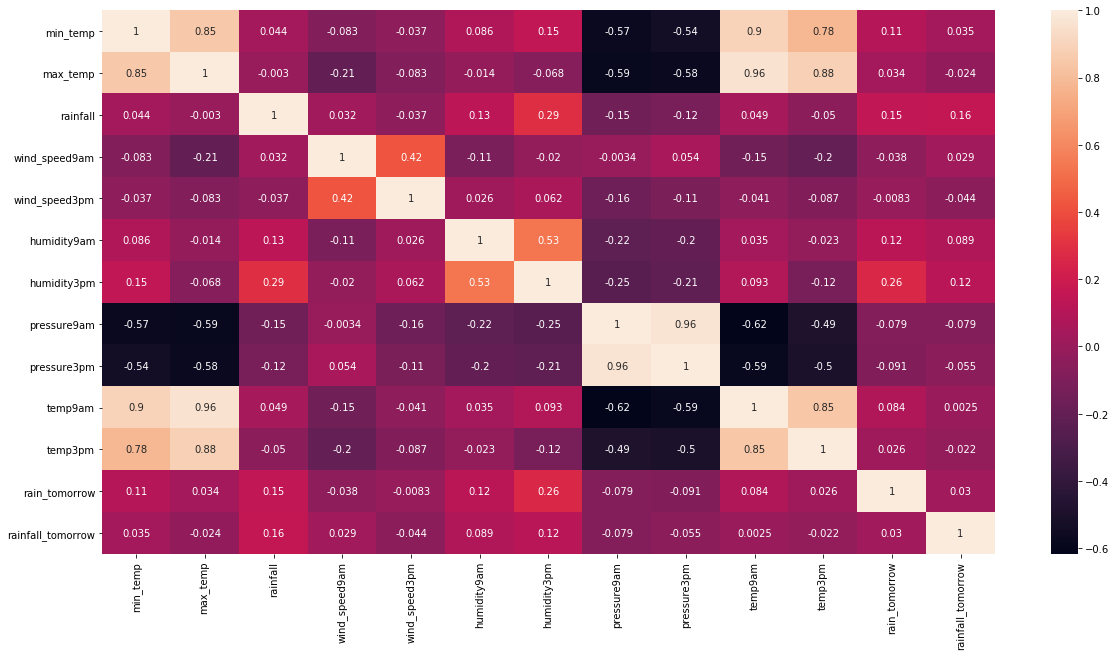

In [1187]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True) #generate heatmap, show data value in each cell 

observations: 
- max_temp and temp_9am have high correlation 
- min_temp and temp_9am have high correlation
- pressure_9am ad pressure_3pm have high positive correlation 
- rainfall seems to have the highes positive correlation with humidity_3pm (.29), 
followed by rainfall and then humidity_9am  

In [1188]:
# TODO: plot distributions: 


In [1189]:
# end data analysis and visualization 


In [1190]:
#option 2: split by year: 

# year = pd.to_datetime(df.Date).dt.year

# train = df[year < 2015]
# validate = df[year == 2015]
# test = df[year > 2015]

Random Forest 

Decision Tree: 
supervised learning method that can be used for classification and regression. 
Random Forest: 
made up of individual decision trees, and the tree in the forest that gets the most
votes becomes the prediction of the model 



In [1191]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [1192]:
input_cols = [
                'min_temp', 
                'max_temp', 
                'wind_speed9am', 
                'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                'temp9am', 
                'temp3pm',
                'rainfall']

# input_cols = [
#                 'temperature',
#                 'dewpoint_temperature',
#                 'relative_humidity',
#                 'cloud_cover',  
#                 'precipitation']
target_col = ['rain_tomorrow'] #yes/no will it rain tomorrow 

In [1193]:
x_val = validate[input_cols].copy()
y_val = validate[['rain_tomorrow']].copy()

x_train = train[input_cols].copy()
y_train = train[['rain_tomorrow']].copy()

x_test = test[input_cols].copy()
y_test = test[['rain_tomorrow']].copy()

We have a problem where we our data is around 80% no, and 20% no. This causes an imbalance for a false high accuracy by simply predicting No more than Yes. Here we show the imbalance of no/yes's for rain_tomorrow. 

In [1194]:
df['rain_tomorrow'].value_counts()

0    2955
1     662
Name: rain_tomorrow, dtype: int64

In [1195]:
#option 1: using nearMidd 
# poopoo 
# nm = NearMiss()
# x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

In [1196]:
#option 2:  random undersampler 
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)

In [1197]:
x_train = x_train_resampled
y_train = y_train_resampled

Now we check to see if our samples are resized correctly by the minority class. 

In [1198]:
y_train['rain_tomorrow'].value_counts()

1    1768
0    1768
Name: rain_tomorrow, dtype: int64

Now we scale the numeric columns to standardize our data. 
Otherwise, our would weigh higher values greater than smaller values regardless of unit without scaling. 


In [1199]:
scaler = MinMaxScaler().fit(df[input_cols])

x_val[input_cols] = scaler.transform(x_val[input_cols])
x_test[input_cols] = scaler.transform(x_test[input_cols])
x_train[input_cols] = scaler.transform(x_train[input_cols])

Verify that our data has been rescaled. 

In [1200]:
x_val.describe().loc[['min', 'max']]

,min_temp,max_temp,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,rainfall
min,0.0,0.075949,0.0,0.000000,0.0,0.0,0.047619,0.033333,0.0,0.0,0.000000
max,1.0,0.949367,1.0,0.935484,1.0,1.0,1.000000,0.991667,1.0,1.0,0.912621


In [1201]:
# model = RandomForestClassifier(n_estimators = 100) 
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1202]:
x_pred_train = model.predict(x_train)


In [1203]:
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100)) 

Training Accuracy Score: 100.00
Validation Accuracy Score: 74.41
Test Accuracy Score: 75.69


In [1204]:
y_val['rain_tomorrow'].value_counts() 


0    590
1    133
Name: rain_tomorrow, dtype: int64

In [1205]:
# print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_val) * 100))


100% training accuracy means our model is possibly just memorizing the inputs, and since our validation score is so much lower, we have a case of overfitting. 

One way of addressing this is to reduce the max depth of the tree (TODO: add explanation here of how this helps overfitting)

In [1206]:
dtree= DecisionTreeClassifier(max_depth =5 , random_state=42)

dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

we will tune max depth later. 

In [1207]:
print('Training Accuracy Score: {:.2f}'.format(dtree.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(dtree.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(dtree.score(x_test,y_test)*100)) 

Training Accuracy Score: 67.53
Validation Accuracy Score: 71.51
Test Accuracy Score: 70.99


Our validation score more closesly matches our accuracy, which means we are no longer overfitting to our training data. 

In [1208]:
tree_pred = dtree.predict(x_test)

In [1209]:
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, tree_pred) * 100))


F1 Score: 38.95


Plot the tree

[Text(0.5, 0.875, 'humidity3pm <= 0.426\ngini = 0.5\nsamples = 3536\nvalue = [1768, 1768]'),
 Text(0.25, 0.625, 'humidity9am <= 0.034\ngini = 0.363\nsamples = 901\nvalue = [686, 215]'),
 Text(0.125, 0.375, 'temp9am <= 0.74\ngini = 0.34\nsamples = 23\nvalue = [5, 18]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'humidity9am <= 0.42\ngini = 0.348\nsamples = 878\nvalue = [681, 197]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'humidity3pm <= 0.619\ngini = 0.484\nsamples = 2635\nvalue = [1082, 1553]'),
 Text(0.625, 0.375, 'temp9am <= 0.913\ngini = 0.5\nsamples = 1277\nvalue = [642, 635]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'min_temp <= 0.741\ngini = 0.438\nsamples = 1358\nvalue = [440, 918]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

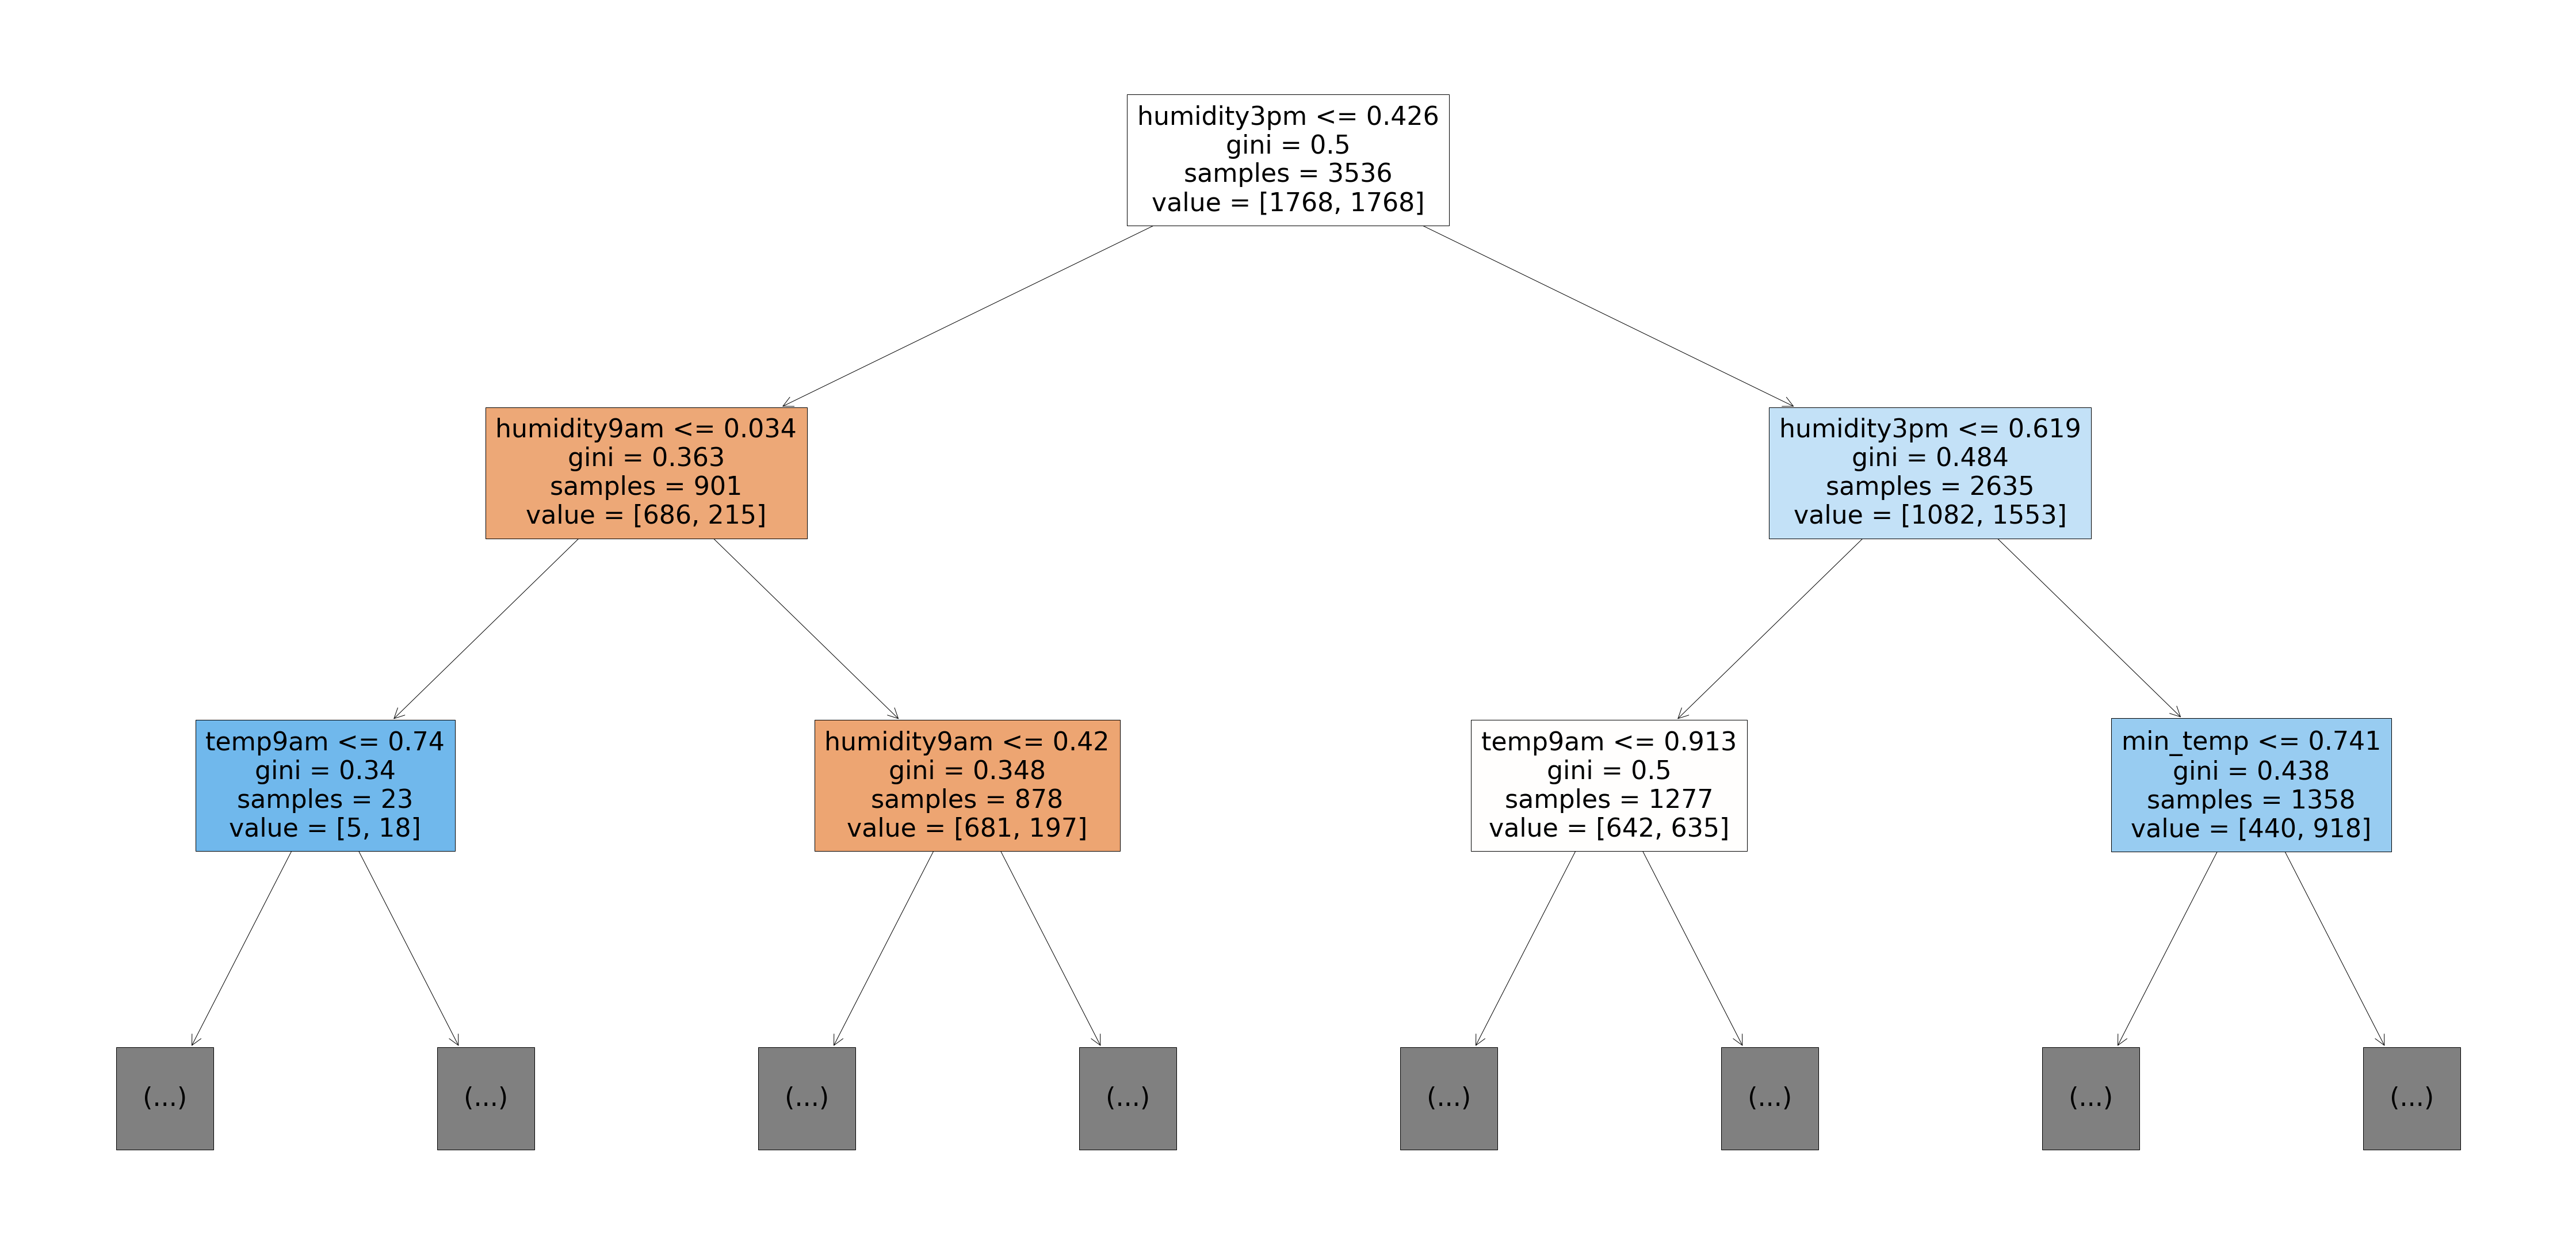

In [1210]:
plt.figure(figsize=(80,40))
plot_tree(dtree, feature_names=x_train.columns, max_depth=2, filled=True)

Now we want to see feature importance. 

In [1211]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [1212]:
importance_df.head(10)


,feature,importance
5,humidity3pm,0.202312
4,humidity9am,0.101827
7,pressure3pm,0.097538
3,wind_speed3pm,0.091204
8,temp9am,0.087757
0,min_temp,0.081920
2,wind_speed9am,0.078586
9,temp3pm,0.078563
6,pressure9am,0.075408
1,max_temp,0.067245


We see that Humidity_3pm was the most important feature by a good margin. TODO: does this follow with our expectations at the beginning when looking into coeffs? 

Now back to hyperparameter tuning - to reduce overfitting, we were going to tune max_depth

In [1213]:
model.tree_.max_depth


23

In [1214]:
validation_accuracies = []
train_accuracies = []
max_depths = []

for i in range(1, 24):
  max_depths.append(i)
  model = DecisionTreeClassifier(max_depth=i, random_state=42)
  model.fit(x_train, y_train)

  train_score = model.score(x_train,y_train)*100
  train_accuracies.append(train_score)

  validation_score = model.score(x_val,y_val)*100
  validation_accuracies.append(validation_score)


  print('Scores for max_depth {}'.format(i))
  print('Training Accuracy Score: {:.2f}'.format(train_score))
  print('Validation Accuracy Score: {:.2f}'.format(validation_score))
  print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))
  print()

Scores for max_depth 1
Training Accuracy Score: 63.32
Validation Accuracy Score: 48.41
Test Accuracy Score: 48.20

Scores for max_depth 2
Training Accuracy Score: 63.89
Validation Accuracy Score: 70.40
Test Accuracy Score: 70.30

Scores for max_depth 3
Training Accuracy Score: 64.99
Validation Accuracy Score: 70.12
Test Accuracy Score: 69.75

Scores for max_depth 4
Training Accuracy Score: 65.89
Validation Accuracy Score: 71.78
Test Accuracy Score: 70.86

Scores for max_depth 5
Training Accuracy Score: 67.53
Validation Accuracy Score: 71.51
Test Accuracy Score: 70.99

Scores for max_depth 6
Training Accuracy Score: 69.80
Validation Accuracy Score: 53.53
Test Accuracy Score: 55.52

Scores for max_depth 7
Training Accuracy Score: 73.11
Validation Accuracy Score: 55.33
Test Accuracy Score: 57.73

Scores for max_depth 8
Training Accuracy Score: 74.92
Validation Accuracy Score: 72.34
Test Accuracy Score: 72.93

Scores for max_depth 9
Training Accuracy Score: 79.13
Validation Accuracy Score:

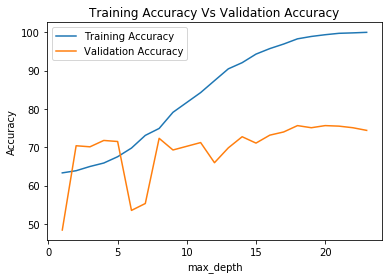

In [1215]:
#Graph training vs validation accuracy 
plt.plot(max_depths, train_accuracies)
plt.plot(max_depths, validation_accuracies)
plt.title('Training Accuracy Vs Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

It would seem that validation accuracy stabilizes around a max_depth of 8. TODO: interpret results. Explain why validation might dip around 6-7? 

In [1216]:
model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(x_train, y_train)
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Training Accuracy Score: 74.92
Validation Accuracy Score: 72.34
Test Accuracy Score: 72.93


Now we'll try tuning the max_leaf_nodes. 
the Gini impurity is how often a randomly chosen element is incorrectly classified. 
Insetad of finding the best split layer by layer, it'll look at all possible splits and only split the node with the lower gini value regardless of the level. 

In [1217]:
model = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
model.fit(x_train, y_train)
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Training Accuracy Score: 68.01
Validation Accuracy Score: 74.97
Test Accuracy Score: 75.83


In [1218]:
validation_accuracies = []
train_accuracies = []
max_depths = []

for i in range(2, 100):
  max_depths.append(i)
  model = DecisionTreeClassifier(max_leaf_nodes=i, random_state=42)
  model.fit(x_train, y_train)

  train_score = model.score(x_train,y_train)*100
  train_accuracies.append(train_score)

  validation_score = model.score(x_val,y_val)*100
  validation_accuracies.append(validation_score)


  
# print('Scores for max_leaf_nodes {}'.format(i))
# print('Training Accuracy Score: {:.2f}'.format(train_score))
# print('Validation Accuracy Score: {:.2f}'.format(validation_score))
# print('Max Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))
# print()

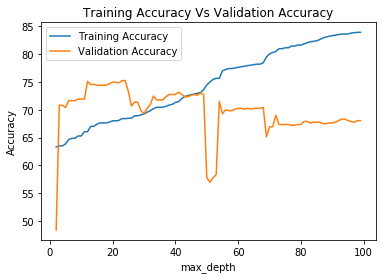

In [1219]:
#Graph training vs validation accuracy 
plt.plot(max_depths, train_accuracies)
plt.plot(max_depths, validation_accuracies)
plt.title('Training Accuracy Vs Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

It would appear our best max_leaf_nodes is at 45-47.

In [1220]:
model = DecisionTreeClassifier(max_leaf_nodes=47, random_state=42)
model.fit(x_train, y_train)
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Training Accuracy Score: 72.96
Validation Accuracy Score: 72.61
Test Accuracy Score: 72.38


Now if we combine our tuned max_depth and max_leaf_nodes

In [1221]:
validation_accuracies = []
train_accuracies = []
max_depths = []

for i in range(2, 12):
  max_depths.append(i)
  model = DecisionTreeClassifier(max_depth = i, max_leaf_nodes=48, random_state=42)
  model.fit(x_train, y_train)

  train_score = model.score(x_train,y_train)*100
  train_accuracies.append(train_score)

  validation_score = model.score(x_val,y_val)*100
  validation_accuracies.append(validation_score)

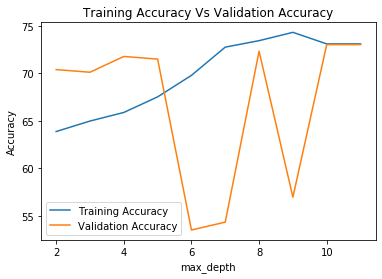

In [1222]:
#Graph training vs validation accuracy 
plt.plot(max_depths, train_accuracies)
plt.plot(max_depths, validation_accuracies)
plt.title('Training Accuracy Vs Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [1223]:
model = DecisionTreeClassifier(max_leaf_nodes=48, max_depth=8, random_state=42)
model.fit(x_train, y_train)
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Training Accuracy Score: 73.44
Validation Accuracy Score: 72.34
Test Accuracy Score: 72.10


In [1224]:
max_depth = 8
max_leaf_nodes = 48

After tuning, our optimal hyperparameters are max_depth=8 and max_leaf_nodes=48. We have a test accuracy score of 72.1

Comparing the new scores with old baseline scores

In [1225]:
# insert code for comparing old and new scores 

Now we'll use random forest 

In [1226]:
rforest_base = RandomForestClassifier(max_depth=max_depth, 
                                      max_leaf_nodes = max_leaf_nodes, 
                                      random_state=24,
                                      n_jobs=-1)
rforest_base.fit(x_train, y_train)

y_pred_forest = rforest_base.predict(x_test)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [1227]:
print('Training Accuracy Score: {:.2f}'.format(rforest_base.score(x_train,y_train)*100))
print('Validation Accuracy Score: {:.2f}'.format(rforest_base.score(x_val,y_val)*100))
print('Test Accuracy Score: {:.2f}'.format(rforest_base.score(x_test,y_test)*100))

Training Accuracy Score: 82.95
Validation Accuracy Score: 73.44
Test Accuracy Score: 71.82


We'll first try tuning the random forest model


In [1237]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [1238]:
print(classification_report(y_pred_forest, y_test)) 


              precision    recall  f1-score   support

           0       0.75      0.89      0.81       503
           1       0.57      0.33      0.41       221

    accuracy                           0.72       724
   macro avg       0.66      0.61      0.61       724
weighted avg       0.69      0.72      0.69       724



precision is number of correctly identified 0/1s divided by all the times the model predicted 0/1. So our precision in correctly guessing that it rained tomorrow when it actually did is .57. 

Recall is how many 0/1s were correctly identified divided by the total number of 0/1s. So our recall in correctly identifying when it would rain tomorrow is .33. 

In [1242]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3,6,9], 
    'bootstrap':[True, False],
    'max_leaf_nodes': [10, 30, 50], 
} 

In [1]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train.values.ravel()) 
print(grid_search.best_estimator_) 

NameError: name 'GridSearchCV' is not defined

In [ ]:
model_grid = RandomForestClassifier(max_depth=9, 
                                    max_features="log2", 
                                    max_leaf_nodes=9, 
                                    n_estimators=25) 
model_grid.fit(x_train, y_train.values.ravel()) 
y_pred_grid = model.predict(x_test) 
print(classification_report(y_pred_grid, y_test)) 

In [1233]:
# validation_accuracies = []
# train_accuracies = []
# n_estimators = []

# for i in range(2, 100):
#   n_estimators.append(i)
#   model = RandomForestClassifier(max_depth=max_depth, 
#                                   max_leaf_nodes = max_leaf_nodes, 
#                                   n_estimators=i,
#                                   random_state=24,
#                                   n_jobs=-1)
#   model.fit(x_train, y_train.values.ravel())

#   train_score = model.score(x_train,y_train)*100
#   train_accuracies.append(train_score)

#   validation_score = model.score(x_val,y_val)*100
#   validation_accuracies.append(validation_score)

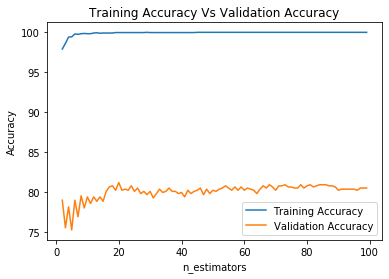

In [1234]:
# #Graph training vs validation accuracy 
# plt.plot(n_estimators, train_accuracies)
# plt.plot(n_estimators, validation_accuracies)
# plt.title('Training Accuracy Vs Validation Accuracy')
# plt.xlabel('n_estimators')
# plt.ylabel('Accuracy')
# plt.legend(['Training Accuracy', 'Validation Accuracy'])
# plt.show()

Conclusion: TODO